# Advanced Lane Finding

In [1]:
# Pipeline
# 1 - calibrate camera
# 2 - distortion correction
# 3 - color and gradient threshold
# 4 - perspective transform
# 5 - locate lines (1 - with histogram, 2 - with convolution)
# 6 - measure curvature

In [22]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#%matplotlib qt

ModuleNotFoundError: No module named 'matplotlib.pyimg'

In [3]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

In [46]:
def calibrate_camera():
    """
    Calibrate camera with chess board.
    
    Input files were provided and are stored in ./camera_cal/*
    
    Ref.:
    [1] https://docs.opencv.org/3.0-beta/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#findChessboardCorners
    [2] https://docs.opencv.org/3.0-beta/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#drawchessboardcorners
    [3] http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
    [4] https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_calib3d/py_calibration/py_calibration.html
    """
    w = 9
    h = 6
    
    # termination criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((h*w, 3), np.float32)
    objp[:, :2] = np.mgrid[0:w, 0:h].T.reshape(-1, 2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images (there are 20)
    images = glob.glob('./camera_cal/calibration*.jpg')
    
    cmtrx = np.zeros((3, 3))
    cdist = np.zeros((1, 5))
    n = len(images)

    # Step through the list and search for chessboard corners
    for fname in images:
        
        # cv2 read images in BGR color space
        img0 = cv2.imread(fname)
        
        # grayscale
        gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
        shape = gray.shape[::-1]

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (w, h), None)

        # If found, add object points, image points
        if ret == True:
            
            # objpoints are the original "perfect" points in the grid
            objpoints.append(objp)
            
            # increase accuracy
            cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            
            # imgpoints are the same points in the distorted image
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img0, (w, h), corners, ret)
        else:
            print("Nothing found for: " + fname, ret)
    
    # 
    # The for-loop builds the arrays 'objpoints' and 'imgpoints'
    # that are used here to estimate camera coefficients
    #        
    # ret   - True/False
    # mtx   - camera matrix
    # dist  - distortion coefficients
    # rvecs - rotation vectors
    # tvecs - translation vectors
    # 
    r, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)
    #h0, w0 = img.shape[:2]
    #newmtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w0, h0), 1, (w0, h0))
    return mtx, dist


In [5]:
def remove_distortion():
    pass


In [6]:
def apply_threshold():
    pass


In [7]:
def camera_top_view():
    pass


In [8]:
def find_lines():
    pass


In [9]:
def calc_curvature():
    pass


# Exec

In [48]:
mtx, dist = calibrate_camera()

Nothing found for: ./camera_cal/calibration5.jpg False
Nothing found for: ./camera_cal/calibration4.jpg False
Nothing found for: ./camera_cal/calibration1.jpg False
[[  1.15694047e+03   0.00000000e+00   6.65948820e+02]
 [  0.00000000e+00   1.15213880e+03   3.88784788e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[ -2.37638062e-01  -8.54041488e-02  -7.90999658e-04  -1.15882238e-04
    1.05725943e-01]]


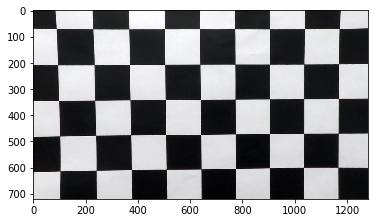

In [50]:
plt.figure()
plt.imshow(cv2.undistort(cv2.imread("./camera_cal/calibration1.jpg"), mtx, dist, None, mtx))